In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULT_ROOT = Path('results')
result_dir = {folder.name: folder for folder in RESULT_ROOT.iterdir() if folder.is_dir()}

for name, folder in result_dir.items():
    result_dir[name] = {sub_dir.name: sub_dir for sub_dir in folder.iterdir()}

in_domain_paths = result_dir['in-domain']
general_model_paths = result_dir['general_model']

In [3]:
def load_result_df(result_dir, method_label):
    result = pd.DataFrame()
    for file in result_dir.glob('*.csv'):
        tmp = pd.read_csv(file)
        result = pd.concat([result, tmp], axis='index')
    result.model_name = result.model_name.map(lambda x: f'{x}-{method_label}')
    return result

In [4]:
in_rf_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['RandomForestRegressor'])
in_lbg_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['LGBMRegressor'])
in_domain_df = pd.concat([in_lbg_result, in_rf_result], axis='index')

In [10]:
gen_rf_result = load_result_df(method_label='general', result_dir=general_model_paths['RandomForestRegressor'])
gen_lbg_result = load_result_df(method_label='general', result_dir=general_model_paths['LGBMRegressor'])
gen_domain_df = pd.concat([gen_rf_result, gen_lbg_result], axis='index')
result = pd.concat([gen_domain_df, in_domain_df], axis='index')

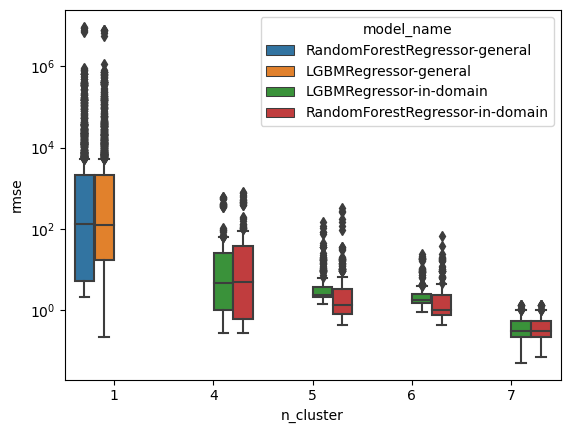

In [11]:
sns.boxplot(data=result, x='n_cluster', y='rmse', hue='model_name')
plt.yscale('log')

<Axes: xlabel='n_cluster', ylabel='time'>

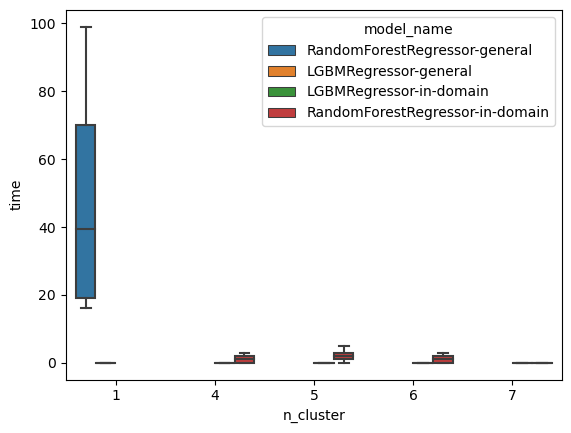

In [13]:
sns.boxplot(data=result, x='n_cluster', y='time', hue='model_name')
# plt.yscale('log')

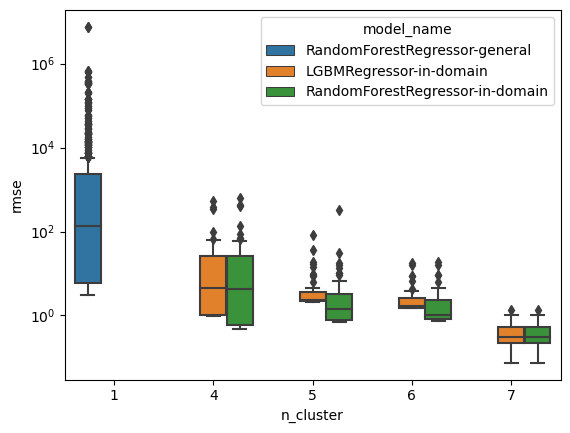

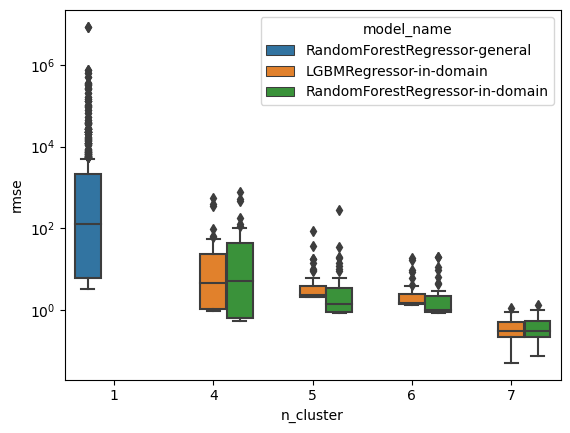

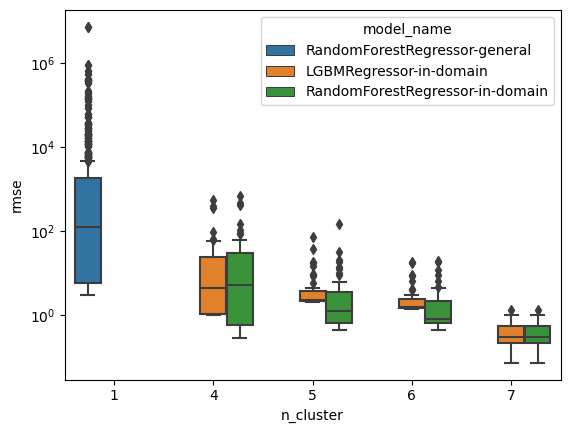

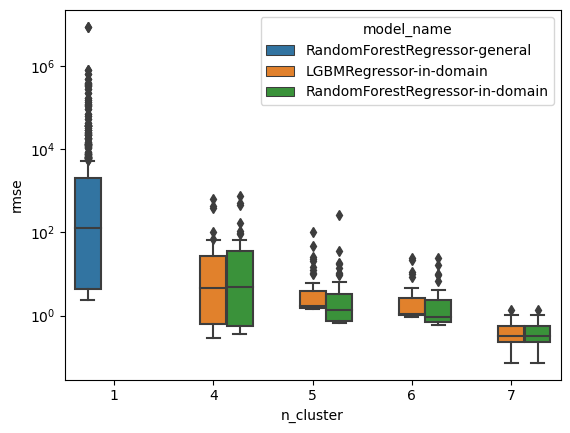

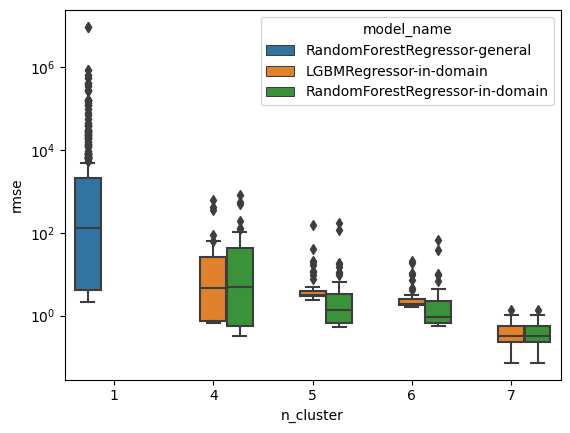

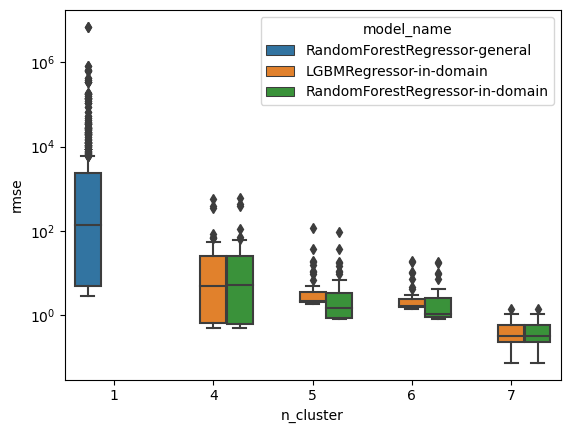

In [8]:
sizes = result.window_size.unique()
for size in sizes:
    sns.boxplot(data=result[result.window_size == size], x='n_cluster', y='rmse', hue='model_name')
    plt.yscale('log')
    plt.show()

In [9]:
result.model_name.unique()

array(['RandomForestRegressor-general', 'LGBMRegressor-in-domain',
       'RandomForestRegressor-in-domain'], dtype=object)